Modelo 'Barrel_OBJ.obj' cargado exitosamente.
Colores preexistentes del modelo eliminados (si los había).

Visualizando los componentes de la malla por separado...


[vedo.plotter:540] WARNING: having set N, shape is ignored.



--- Información Estructural del Modelo ---
Número de Vértices: 4572
Número de Aristas:   16992
Número de Caras:    5664

Generando animación GIF 'barril_rotacion_mejorado.gif'...

Animación guardada exitosamente como 'barril_rotacion_mejorado.gif'.

Mostrando la animación generada (puede tardar un momento en cargar):


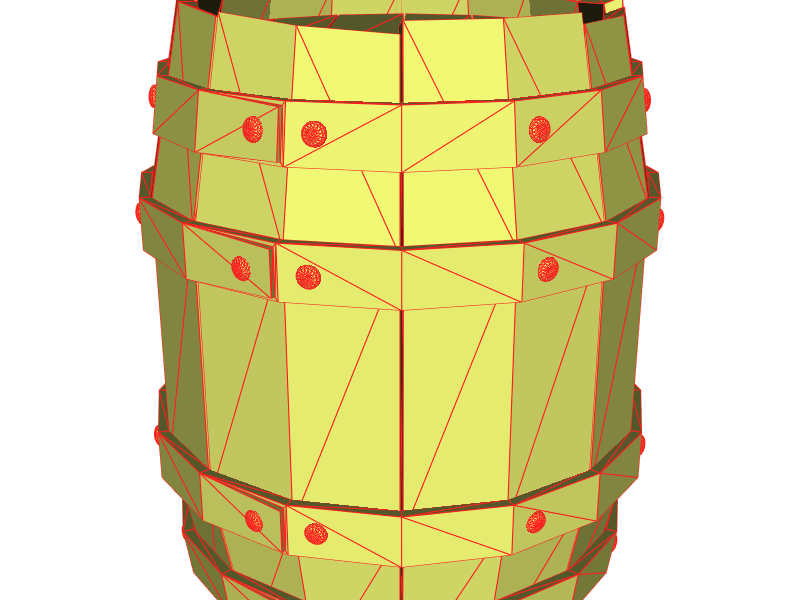

In [14]:
import trimesh
import vedo
import numpy as np
import imageio
from IPython.display import Image, display
import sys

# Configuración Centralizada
MODEL_FILENAME = 'Barrel_OBJ.obj'

# Colores
COLOR_VERTICES = 'black'
COLOR_EDGES = 'red'
COLOR_FACES = (247, 255, 120)

# Parámetros de visualización
VERTEX_SIZE = 8
EDGE_LINE_WIDTH = 2
FACE_EDGE_LINE_WIDTH = 1

# Parámetros de animación
ANIMATION_FILENAME = 'barril_rotacion_mejorado.gif'
ANIMATION_FPS = 20
ANIMATION_DURATION_SEC = 4

try:
    mesh = trimesh.load(MODEL_FILENAME)
    print(f"Modelo '{MODEL_FILENAME}' cargado exitosamente.")

    mesh.visual.vertex_colors = None
    mesh.visual.face_colors = None
    print("Colores preexistentes del modelo eliminados (si los había).")

except ValueError as e:
    print(f"Error al cargar el modelo '{MODEL_FILENAME}': {e}", file=sys.stderr)
    print("Asegúrate de que el archivo existe y está en la ruta correcta.", file=sys.stderr)

if 'mesh' in locals():
    print("\nVisualizando los componentes de la malla por separado...")

    plt = vedo.Plotter(shape=(1, 3), N=3, axes=0, title="Componentes de la Malla 3D")

    # Vértices
    vertex_points = vedo.Points(mesh.vertices, c=COLOR_VERTICES, r=VERTEX_SIZE)
    plt.show(vertex_points, at=0, title=f"Vértices ({len(mesh.vertices)}) - Color: Negro")

    # Aristas
    start_points = mesh.vertices[mesh.edges[:, 0]]
    end_points = mesh.vertices[mesh.edges[:, 1]]
    edge_lines = vedo.Lines(start_points, end_points, c=COLOR_EDGES, lw=EDGE_LINE_WIDTH)
    plt.show(edge_lines, at=1, title=f"Aristas ({len(mesh.edges)}) - Color: Rojo")

    # Caras con Bordes
    face_mesh = vedo.Mesh([mesh.vertices, mesh.faces])
    face_mesh.c(COLOR_FACES).lc(COLOR_EDGES).lw(FACE_EDGE_LINE_WIDTH)
    plt.show(face_mesh, at=2, title=f"Caras ({len(mesh.faces)}) - Color: Amarillo/Rojo")

    # Información Estructural
    print("\n--- Información Estructural del Modelo ---")
    print(f"Número de Vértices: {len(mesh.vertices)}")
    print(f"Número de Aristas:   {len(mesh.edges)}")
    print(f"Número de Caras:    {len(mesh.faces)}")

    def generar_animacion_rotacion(trimesh_mesh, filename, fps, duration, bg_color='white'):
        """
        Genera una animación GIF rotando la malla 360 grados alrededor del eje Z.
        """
        print(f"\nGenerando animación GIF '{filename}'...")

        plotter_anim = vedo.Plotter(offscreen=True, bg=bg_color, axes=0)

        vedo_mesh_anim = vedo.Mesh([trimesh_mesh.vertices, trimesh_mesh.faces])
        vedo_mesh_anim.c(COLOR_FACES).lc(COLOR_EDGES).lw(FACE_EDGE_LINE_WIDTH)

        n_frames = int(fps * duration)
        frames = []
        angles = np.linspace(0, 360, n_frames, endpoint=False)

        for i, angle in enumerate(angles):
            plotter_anim.clear()
            plotter_anim.add(vedo_mesh_anim)
            plotter_anim.show(azimuth=angle, elevation=20)
            frames.append(plotter_anim.screenshot(asarray=True))

        imageio.mimsave(filename, frames, fps=fps, loop=0)
        plotter_anim.close()

        print(f"\nAnimación guardada exitosamente como '{filename}'.")
        return Image(filename=filename)

    gif_result = generar_animacion_rotacion(mesh,
                                        filename=ANIMATION_FILENAME,
                                        fps=ANIMATION_FPS,
                                        duration=ANIMATION_DURATION_SEC)

    print("\nMostrando la animación generada (puede tardar un momento en cargar):")
    display(gif_result)

else:
    print("\nNo se pudo continuar debido a un error al cargar el modelo.")